<a href="https://colab.research.google.com/github/yohei-kobayashi-SK/predict-ADL/blob/main/ADLpred_git_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.simplefilter('ignore',DeprecationWarning)

In [ ]:
# **.csv
dataset = pd.read_csv("**train.csv")
dataset2 = pd.read_csv("**test.csv")

In [ ]:
dataset

,year,"sex1:male,0:female",before mRS,damage side:right1 left0,disease_infarction_hemorrhage,Period_of_ impaired consciousness,ALB,medical_history(stroke),complications,start_date_of_mobilization,...,BI_feeding,BI_transfer,BI_glooming,BI_toilet_use,BI_bathing,BI_stairs,BI_dressing,BI_bowels,BI_bladder,target
0,50,1,0,1,0,1,4.0,0,0,2,...,10,10,0,5,0,0,10,10,10,1
1,74,1,0,1,1,3,3.6,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,64,0,0,0,1,0,4.2,0,0,4,...,10,10,0,5,0,0,5,0,0,1
3,78,0,0,0,1,2,3.7,0,0,2,...,0,10,0,5,0,0,0,0,0,1
4,79,1,0,0,1,0,3.5,0,0,2,...,0,5,0,0,0,0,0,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,79,0,0,0,0,5,3.9,0,0,6,...,10,5,0,5,0,5,5,0,5,1
193,76,0,1,1,0,2,4.0,0,0,4,...,0,0,0,0,0,0,0,0,0,1
194,62,1,0,1,0,1,4.1,0,0,6,...,10,10,5,5,0,5,5,5,5,1
195,83,0,0,0,0,1,3.7,0,0,10,...,10,10,5,5,0,0,5,10,10,1


In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
print(dataset.columns)

Index(['year', 'sex1:male,0:female', 'before mRS', 'damage side:right1 left0',
       'disease_infarction_hemorrhage ', 'Period_of_ impaired consciousness',
       'ALB', 'medical_history(stroke)', 'complications',
       'start_date_of_mobilization', 'con level', 'con_question',
       'con_obedience', 'gaze', 'field_of_view', 'facial_paralysis',
       'no_para_upper', 'no_para_low', 'ataxia', 'sensory', 'language',
       'articulation', 'neglect', 'BRSupper', 'BRSfinger', 'BRS_low',
       'ABMS2_turn_over', 'ABMS2_get_up', 'ABMS2_sit', 'ABMS2_rise_up',
       'ABMS2_standing', 'sit_posture', 'sit_extension', 'sit_resistance',
       'stand_posture', 'stand_extension', 'stand_resistance', 'FAC',
       'BI_feeding', 'BI_transfer', 'BI_glooming', 'BI_toilet_use',
       'BI_bathing', 'BI_stairs', 'BI_dressing', 'BI_bowels', 'BI_bladder',
       'target'],
      dtype='object')


In [ ]:
dataset.describe()

,year,"sex1:male,0:female",before mRS,damage side:right1 left0,disease_infarction_hemorrhage,Period_of_ impaired consciousness,ALB,medical_history(stroke),complications,start_date_of_mobilization,...,BI_feeding,BI_transfer,BI_glooming,BI_toilet_use,BI_bathing,BI_stairs,BI_dressing,BI_bowels,BI_bladder,target
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,69.644670,0.675127,0.335025,0.532995,0.614213,1.406091,4.105584,0.203046,0.101523,3.588832,...,5.736041,7.030457,1.548223,4.137056,0.101523,0.583756,3.502538,5.329949,5.228426,0.654822
std,12.576932,0.469521,0.669634,0.500181,0.488021,2.897494,0.544377,0.403291,0.302789,2.327405,...,4.296578,4.811666,2.317625,3.679299,0.706997,1.900414,3.523427,4.547680,4.553940,0.476637
min,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.300000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.800000,0.000000,0.000000,2.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4.100000,0.000000,0.000000,3.000000,...,5.000000,10.000000,0.000000,5.000000,0.000000,0.000000,5.000000,5.000000,5.000000,1.000000
75%,79.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4.400000,0.000000,0.000000,4.000000,...,10.000000,10.000000,5.000000,5.000000,0.000000,0.000000,5.000000,10.000000,10.000000,1.000000
max,99.000000,1.000000,2.000000,1.000000,1.000000,27.000000,7.500000,1.000000,1.000000,20.000000,...,10.000000,15.000000,5.000000,10.000000,5.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [ ]:
X_train = dataset.drop('target',axis = 1)
y_train = dataset['target'].copy()
X_test = dataset2.drop('target',axis = 1)
y_test = dataset2['target'].copy()

In [ ]:
print(X_train.columns)

Index(['year', 'sex1:male,0:female', 'before mRS', 'damage side:right1 left0',
       'disease_infarction_hemorrhage ', 'Period_of_ impaired consciousness',
       'ALB', 'medical_history(stroke)', 'complications',
       'start_date_of_mobilization', 'con level', 'con_question',
       'con_obedience', 'gaze', 'field_of_view', 'facial_paralysis',
       'no_para_upper', 'no_para_low', 'ataxia', 'sensory', 'language',
       'articulation', 'neglect', 'BRSupper', 'BRSfinger', 'BRS_low',
       'ABMS2_turn_over', 'ABMS2_get_up', 'ABMS2_sit', 'ABMS2_rise_up',
       'ABMS2_standing', 'sit_posture', 'sit_extension', 'sit_resistance',
       'stand_posture', 'stand_extension', 'stand_resistance', 'FAC',
       'BI_feeding', 'BI_transfer', 'BI_glooming', 'BI_toilet_use',
       'BI_bathing', 'BI_stairs', 'BI_dressing', 'BI_bowels', 'BI_bladder'],
      dtype='object')


In [ ]:
print(dataset.target)

0      1
1      0
2      1
3      1
4      0
      ..
192    1
193    1
194    1
195    1
196    1
Name: target, Length: 197, dtype: int64


In [ ]:
print(dataset.shape)
print(dataset2.shape)

(197, 48)
(49, 48)


In [ ]:
dataset.isnull().sum()

year                                 0
sex1:male,0:female                   0
before mRS                           0
damage side:right1 left0             0
disease_infarction_hemorrhage        0
Period_of_ impaired consciousness    0
ALB                                  0
medical_history(stroke)              0
complications                        0
start_date_of_mobilization           0
con level                            0
con_question                         0
con_obedience                        0
gaze                                 0
field_of_view                        0
facial_paralysis                     0
no_para_upper                        0
no_para_low                          0
ataxia                               0
sensory                              0
language                             0
articulation                         0
neglect                              0
BRSupper                             0
BRSfinger                            0
BRS_low                  

In [ ]:
#データフレーム形式からNumpy配列へ変換
#X_train = X_train.values
#y_train = y_train.values
#X_test = X_test.values
#y_test = y_test.values

In [ ]:
#訓練モデル
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train,y_train)

XGBClassifier()

In [ ]:
#訓練モデルの予測
y_pred = xgboost_model.predict(X_train)
print(y_pred)

[1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1]


In [ ]:
#デフォルト
#n_estimators:100 max_depth:3～10　min_child_wheight:1 gamma:0 subsample: ccolsample_bytree:1 reg_alpha:0 reg_lambda:0 learning_rate:0.3

In [ ]:
confusion_matrix(y_train, y_pred,labels=[0,1])

array([[ 68,   0],
       [  1, 128]])

In [ ]:
accuracy_score(y_train,y_pred)

0.9949238578680203

In [ ]:
y_pred2 = xgboost_model.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred2,labels=[0,1])

array([[13,  4],
       [ 2, 30]])

In [ ]:
accuracy_score(y_test,y_pred2)

0.8775510204081632

In [ ]:
#グリッドリサーチ後、ベストハイパーパラメータ
final_params ={'n_estimators':100,'max_depth':2,'min_child_weight':10,'gamma':2.0,
                 'colsample_bytree':0.9,'subsample':0.8,'reg_alpha':0.1,'reg_lambda':0,
                 'learning_rate':0.1}

In [ ]:
#XGBClassifierのデフォルト
#n_estimators:100 max_depth:3～10　min_child_wheight:1 gamma:0 subsample: ccolsample_bytree:1 reg_alpha:0 reg_lambda:0 learning_rate:0.3

In [ ]:
#最適化されたハイパーパラメータを使ってモデル訓練
xgboost_opt = XGBClassifier(**final_params,seed=42)
xgboost_opt.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.9, gamma=2.0, max_depth=2, min_child_weight=10,
              reg_alpha=0.1, reg_lambda=0, seed=42, subsample=0.8)

In [ ]:
#訓練モデルの精度
y_pred_opt = xgboost_opt.predict(X_train)

In [ ]:
confusion_matrix(y_train, y_pred_opt,labels=[0,1])

array([[ 53,  15],
       [ 13, 116]])

In [ ]:
accuracy_score(y_train,y_pred_opt)

0.8578680203045685

In [ ]:
#訓練モデルの精度
y_pred_opt2 = xgboost_opt.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred_opt2,labels=[0,1])

array([[15,  2],
       [ 2, 30]])

In [ ]:
accuracy_score(y_test,y_pred_opt2)

0.9183673469387755

In [ ]:
#ROC曲線
from sklearn.metrics import roc_curve

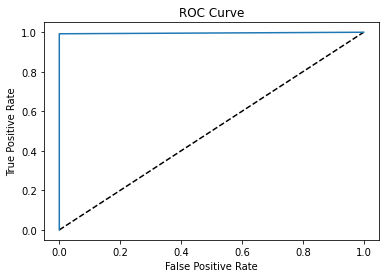

In [ ]:
fpr,tpr,thresholds = roc_curve(y_train,y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

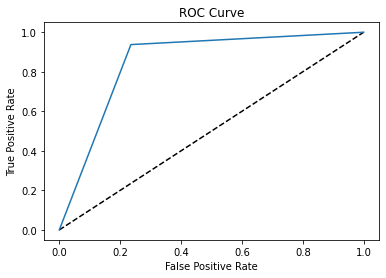

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred2)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
#AUC
print('AUC:{}'.format(roc_auc_score(y_train,y_pred)))
print('AUC:{}'.format(roc_auc_score(y_test,y_pred2)))

AUC:0.9961240310077519
AUC:0.8511029411764706


In [ ]:
confusion_matrix(y_test, y_pred2,labels=[0,1])

array([[13,  4],
       [ 2, 30]])

In [ ]:
#precision(適合率)
from sklearn.metrics import precision_score
print(precision_score(y_train,y_pred,average='binary'))

1.0


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred2,average='binary'))

0.8823529411764706


In [ ]:
#recall.senstive(再現率)
from sklearn.metrics import recall_score
print(recall_score(y_train,y_pred,average='binary'))

0.9922480620155039


In [ ]:
#recall.senstive(再現率)
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred2,average='binary'))

0.9375


In [ ]:
#F値
from sklearn.metrics import f1_score
print(f1_score(y_train,y_pred,average='binary'))

0.9961089494163424


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred2,average='binary'))

0.9090909090909091


In [ ]:
#分類レポート
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.99      1.00       129

    accuracy                           0.99       197
   macro avg       0.99      1.00      0.99       197
weighted avg       0.99      0.99      0.99       197

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.88      0.94      0.91        32

    accuracy                           0.88        49
   macro avg       0.87      0.85      0.86        49
weighted avg       0.88      0.88      0.88        49



In [ ]:
import joblib

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model=xgboost_model,data=X_train,feature_perturbation="interventional",)

In [ ]:
shap_values = explainer(X_train)

In [ ]:
shap_values[0]

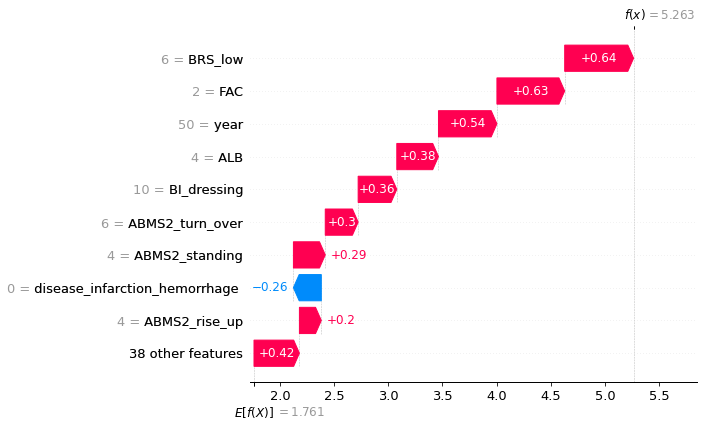

In [ ]:
shap.plots.waterfall(shap_values[0])

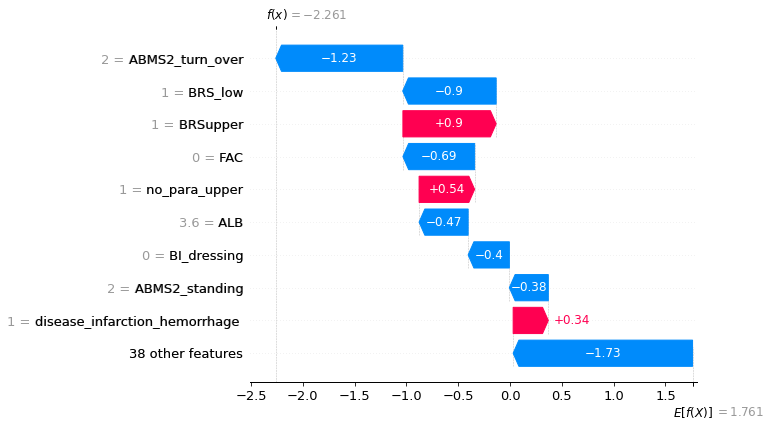

In [ ]:
shap.plots.waterfall(shap_values[1])

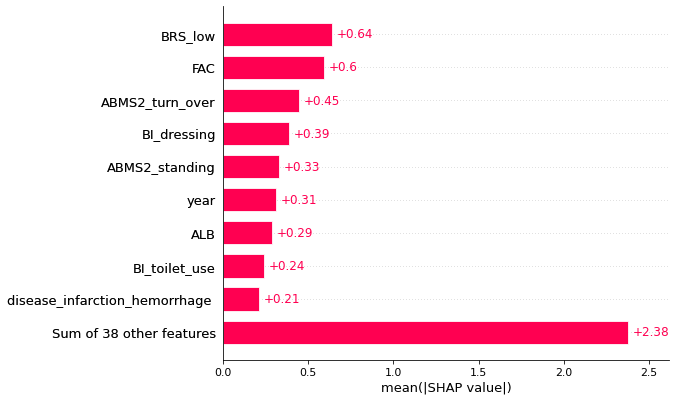

In [ ]:
#学習データでのshap
shap.plots.bar(shap_values=shap_values)

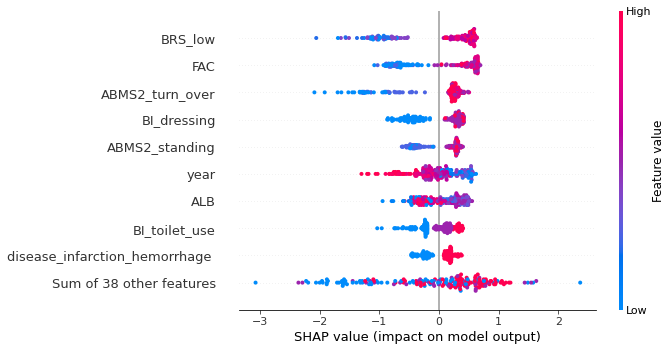

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
explainer2 = shap.TreeExplainer(model=xgboost_model,data=X_test,feature_perturbation="interventional",)

In [ ]:
shap_values2 = explainer2(X_test)

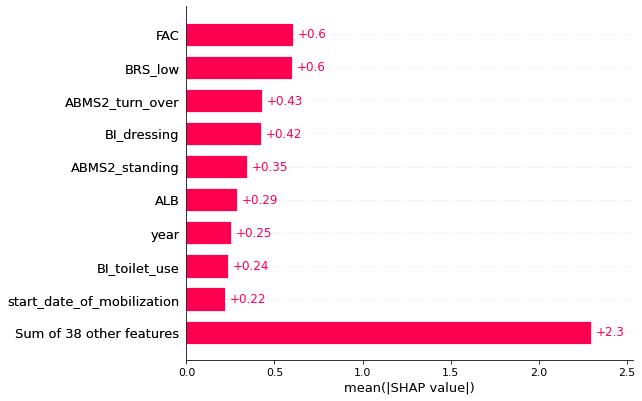

In [ ]:
#テストデータでのshap
shap.plots.bar(shap_values=shap_values2)

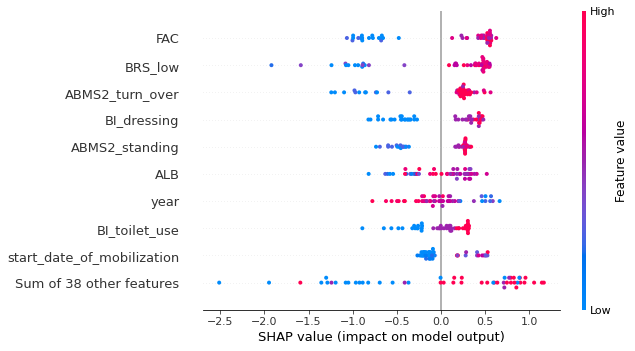

In [ ]:
shap.plots.beeswarm(shap_values2)

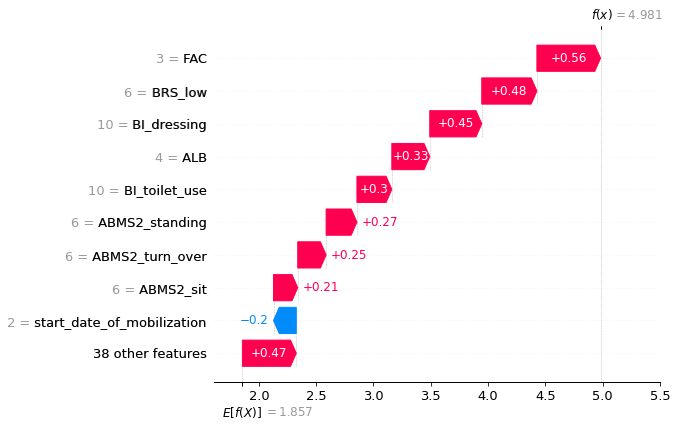

In [ ]:
shap.plots.waterfall(shap_values2[0])